In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [4]:
df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()
df.isnull().sum()  # check for missing values

# Drop rows or fill missing values (optional cleanup)
df.dropna(subset=['country', 'director'], inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Text(0.5, 1.0, 'Count of Movies vs TV Shows')

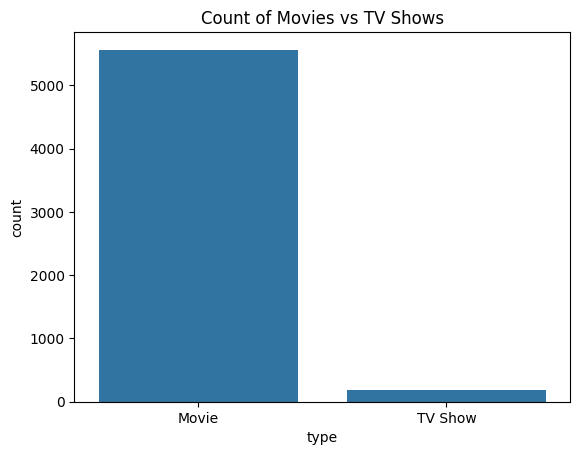

In [6]:
sns.countplot(data=df, x='type')
plt.title('Count of Movies vs TV Shows')


Text(0.5, 1.0, 'Top 10 Genres')

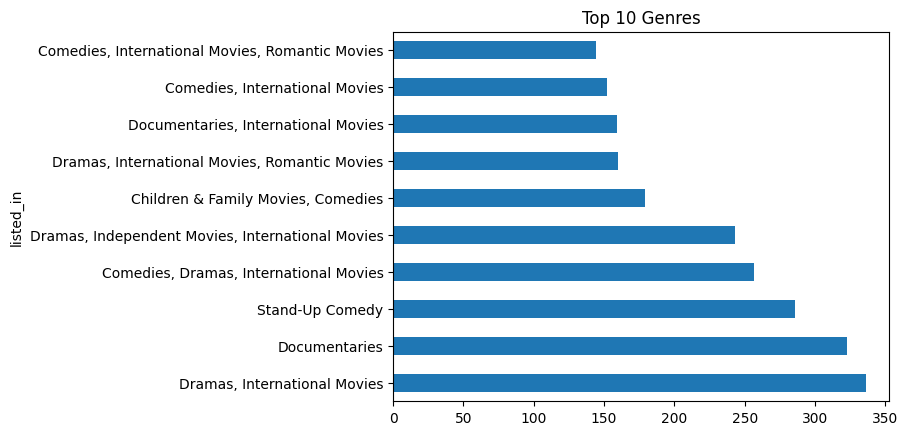

In [7]:
df['listed_in'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Genres')


Text(0.5, 1.0, 'Top Countries Producing Netflix Content')

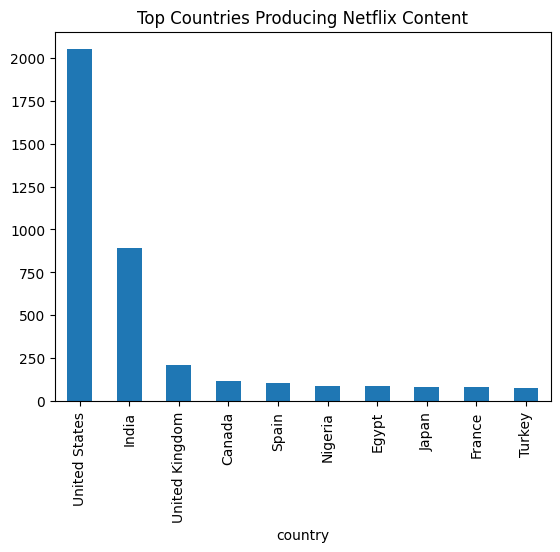

In [8]:
df['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top Countries Producing Netflix Content')


/tmp/ipython-input-11-450567769.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_added'] = df['date_added'].dt.year


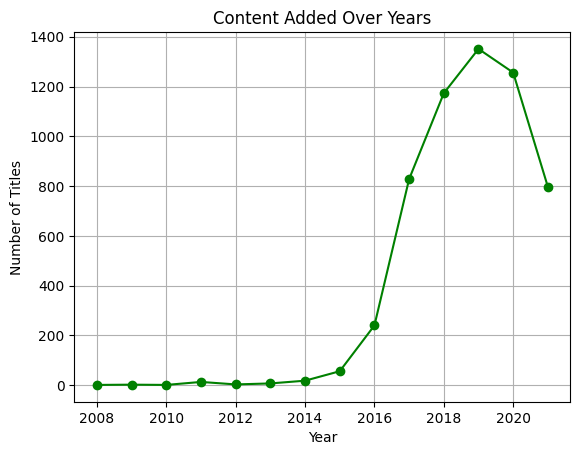

In [11]:
# Convert 'date_added' to datetime (handle errors)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Drop rows with missing dates if needed
df = df.dropna(subset=['date_added'])

# Extract year from the date
df['year_added'] = df['date_added'].dt.year

# Count titles per year and plot
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o', color='green')
plt.title('Content Added Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()



/tmp/ipython-input-12-2309944730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration'] = df_movie['duration'].str.replace(' min','').astype(float)


Text(0.5, 1.0, 'Movie Duration Distribution')

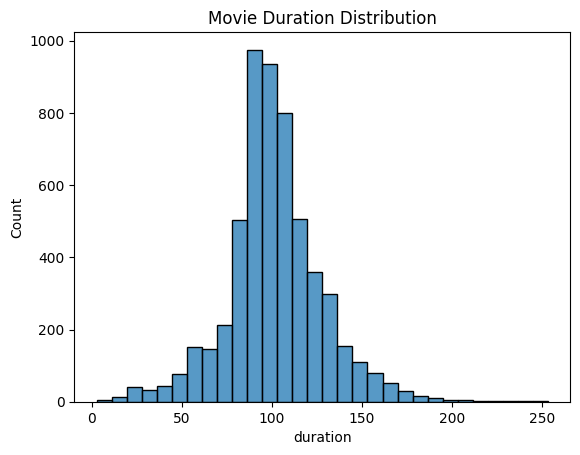

In [12]:
df_movie = df[df['type'] == 'Movie']
df_movie['duration'] = df_movie['duration'].str.replace(' min','').astype(float)
sns.histplot(df_movie['duration'], bins=30)
plt.title('Movie Duration Distribution')


# ***#Key Insights from Netflix Data Analysis***

🔺 **Movies vs TV Shows:**

Netflix has a higher number of Movies compared to TV Shows. Approximately 70% of the titles are Movies, while TV Shows make up the remaining 30%.

🎭 **Popular Genres:**

The most common genre on Netflix is Drama, followed by Comedy, Documentary, and Action. These genres appear frequently across both movies and TV shows.

🌍 **Top Content-Producing Countries:**

USA is the leading country contributing content to Netflix.

India is the second-most common, followed by the UK and Canada.

This indicates a strong focus on both Western and South Asian markets.

🕒 **Movie Duration:**

Most Netflix movies fall in the 90–100 minute range.

A few short films and very long movies exist, but the majority stick to this standard format.

📈 **Content Addition Over Time:**

The number of titles added increased significantly from 2016 to 2019, peaking in 2019.

There was a slight dip in 2020–2021, possibly due to production delays during the COVID-19 pandemic.

🧑‍💼**Director & Actor Frequency:**

Rajiv Chilaka (Indian animation director) appears frequently.

Most cast and directors are not repeated often—suggesting a wide range of contributors across titles.

📝 **Conclusion:**

Netflix has rapidly expanded its content library, prioritizing diverse genres and global reach. With strong representation from the USA and India, the platform balances both international blockbusters and regional storytelling.